# import

In [1]:
!pip install xgboost

    100% |████████████████████████████████| 114.0MB 260kB/s eta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction
from sklearn.decomposition import PCA

#  Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling modules
from xgboost.sklearn import XGBClassifier

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 데이터 적재하기

In [34]:
data=pd.read_csv("./data/1_winequalityN.csv")
dataw=pd.read_csv("./data/1_white.csv")
datar=pd.read_csv("./data/1_red.csv")

data=data.dropna(axis=0)  ##없애버림, 평균값 넣으려면 axis=0대신에 inplate=True 사용
dataw=dataw.dropna(axis=0)

print "wine 데이터셋의 크기:" ,data.shape
print "\nwine 데이터셋의 키:", data.keys()

wine 데이터셋의 크기: (6463, 13)

wine 데이터셋의 키: Index([u'type', u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')


#### 데이터셋의 키
['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

In [43]:
print "타깃(품질)의 크기:",data['quality'].shape
#print "타깃(품질):",data['quality']

타깃(품질)의 크기: (6463,)


In [44]:
data.shape

(6463, 13)

In [45]:
data.head() ##앞쪽 데이터 5개 보여줌

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
data.tail() ##끝쪽 데이터 5개 <삭제되었어도 인덱스는 변하지 않는듯?

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
type                    6463 non-null object
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ MB


# 데이터 살펴보기

In [41]:
data.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [40]:
data.quality.value_counts()
##quality에 대한 data가 3~9까지 있음을 확인할 수 있다.

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

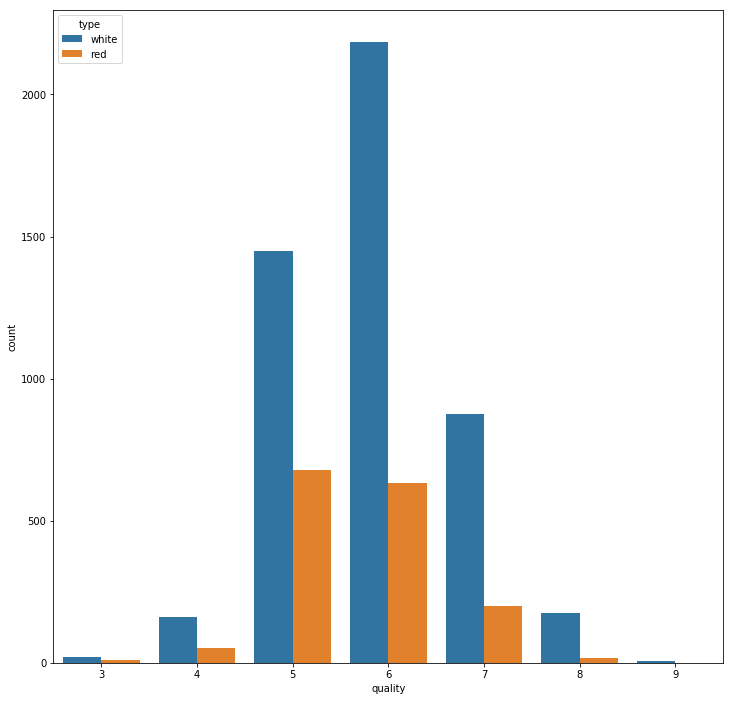

In [36]:
plt.figure(figsize=(12, 12))
sns.countplot(x = 'quality', data=data, hue='type')

white에 비해 red는 품질 데이터 양이 매우 적으며 white도 3등급 9등급의 데이터 양이 매우 적다.

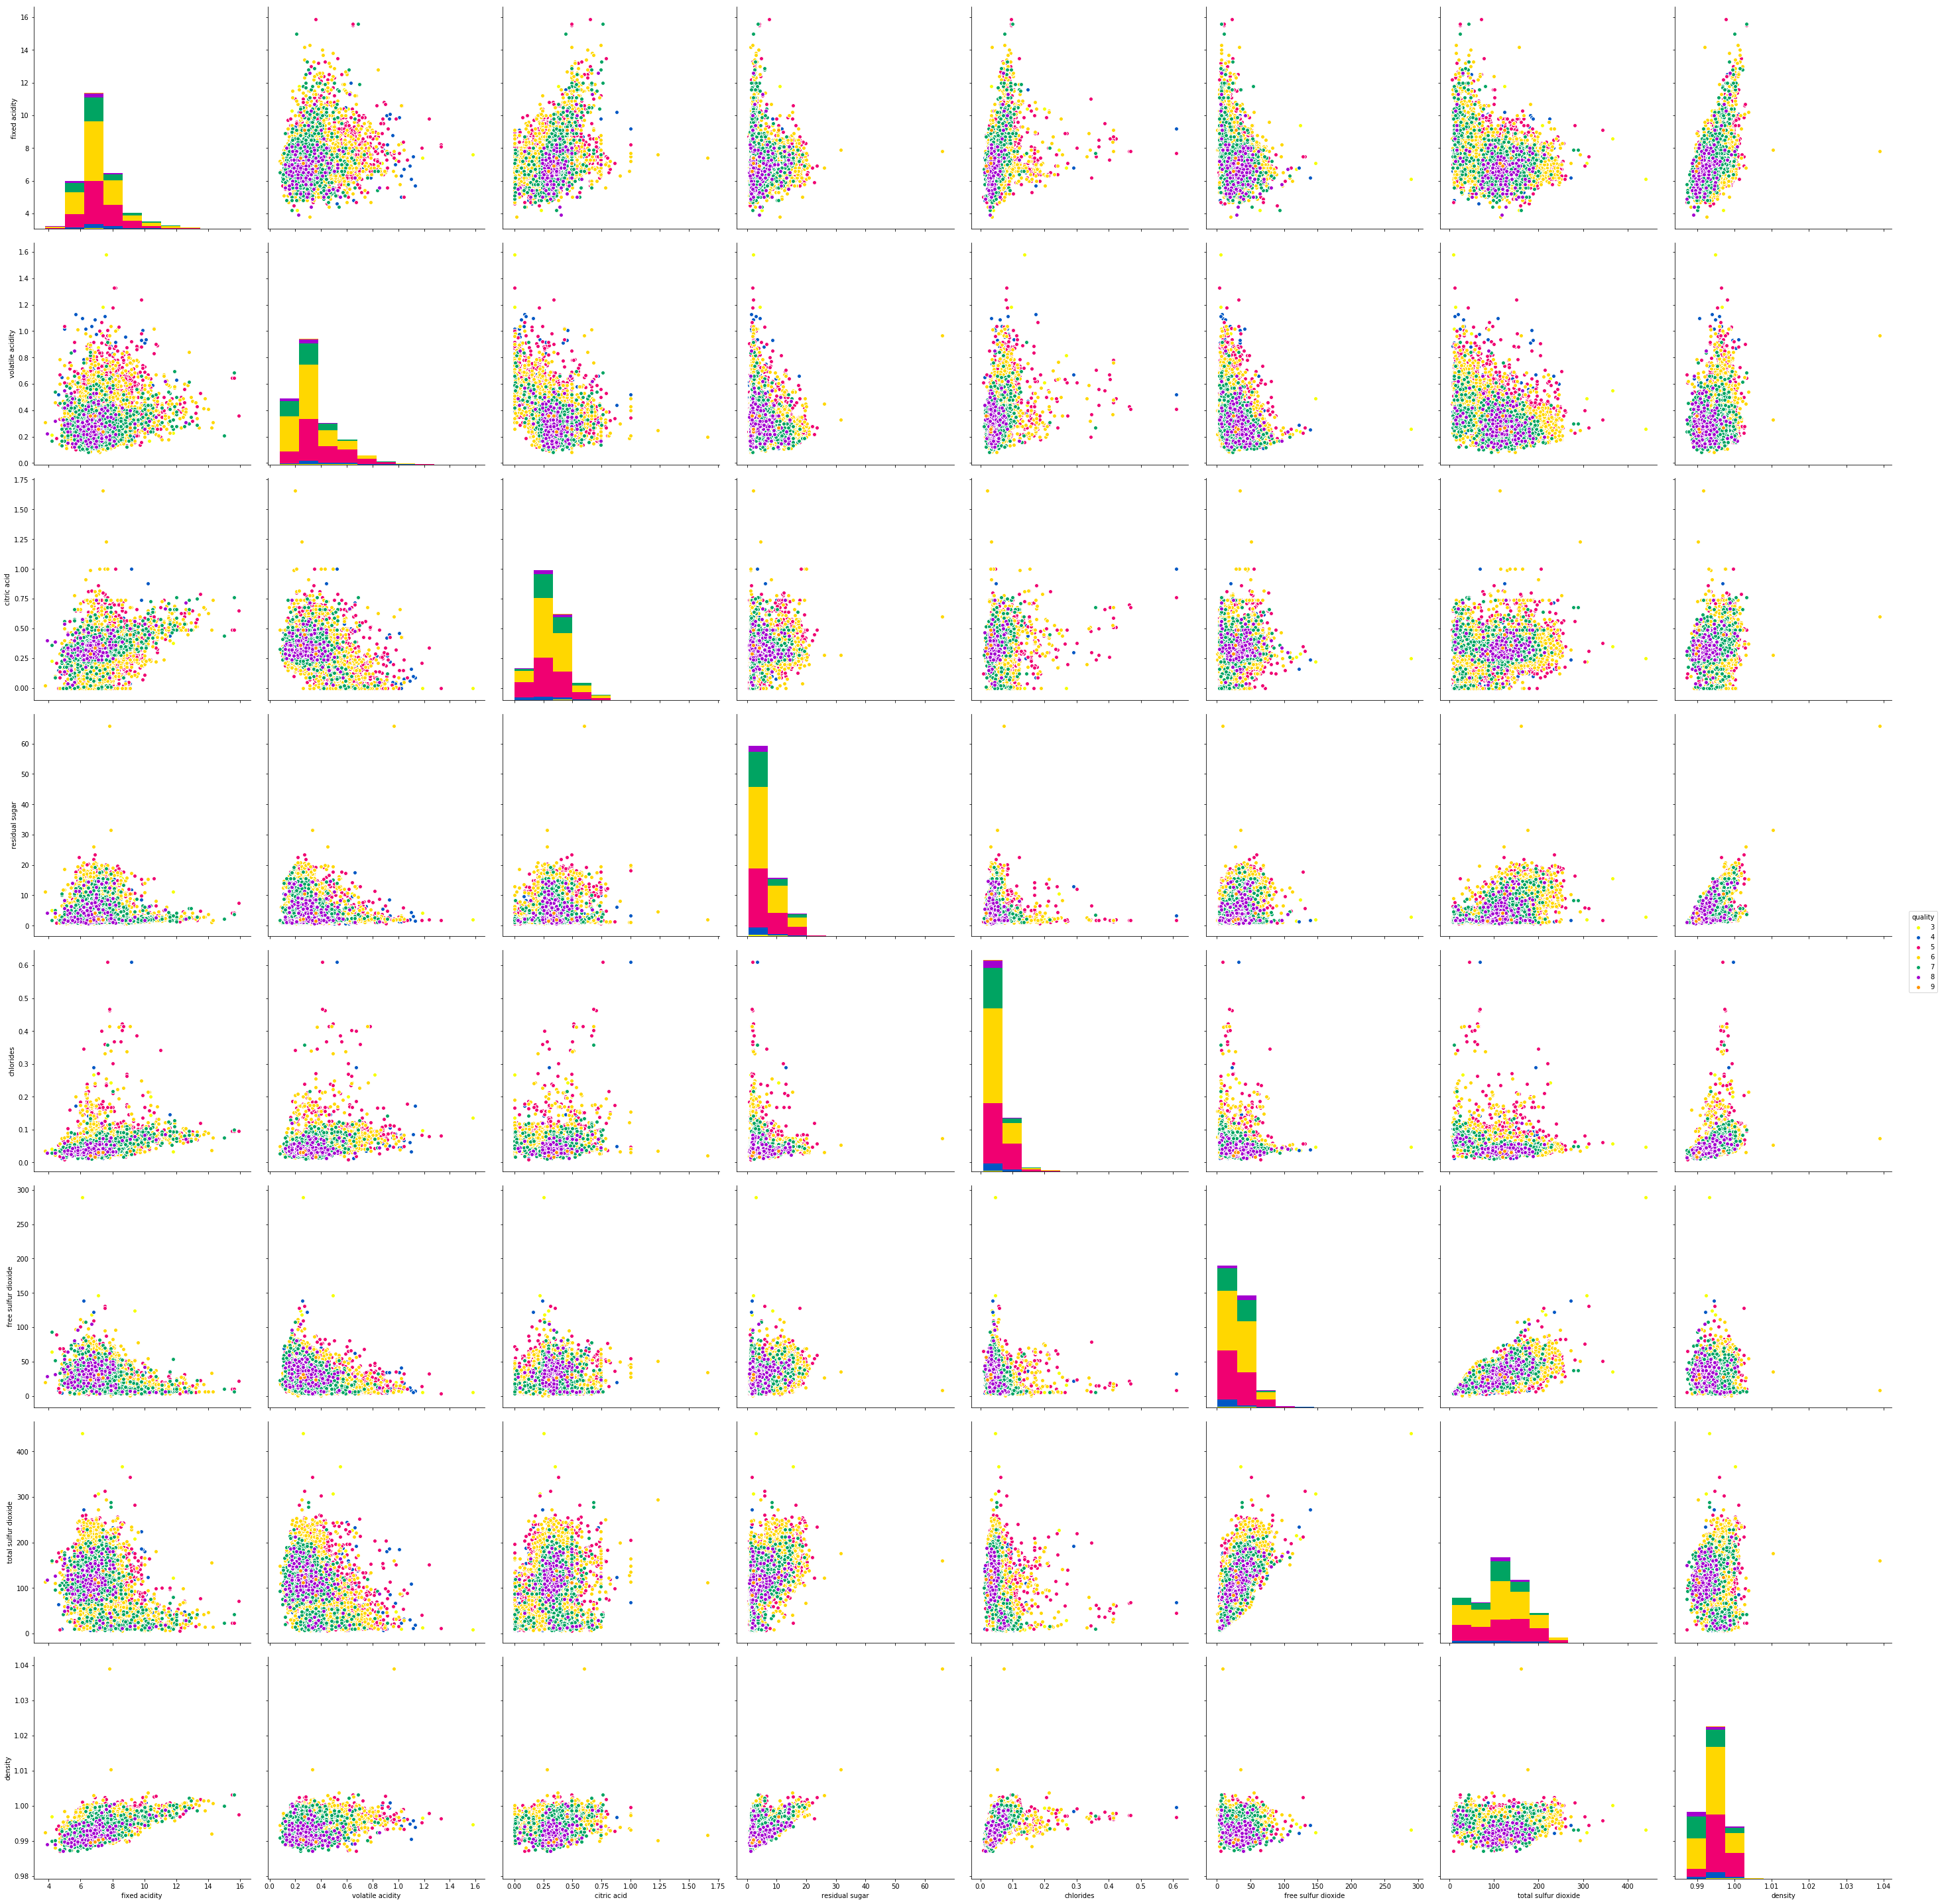

In [37]:
#red+white
sns.pairplot(data, vars = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density'], hue='quality', size = 5, palette="prism")

대부분 점이 겹겹이 쌓여있어서 붓꽃 데이터처럼 명확하게 구분하는 것이 어려워보인다.
이산화황 관련된 특징들(free sulfur dioxide, total sulfur dioxide)이 데이터가 많이 퍼져있고, 특히 total sulfur dioxide의 경우 등급의 범위가 가장 광범위하게 퍼져있음

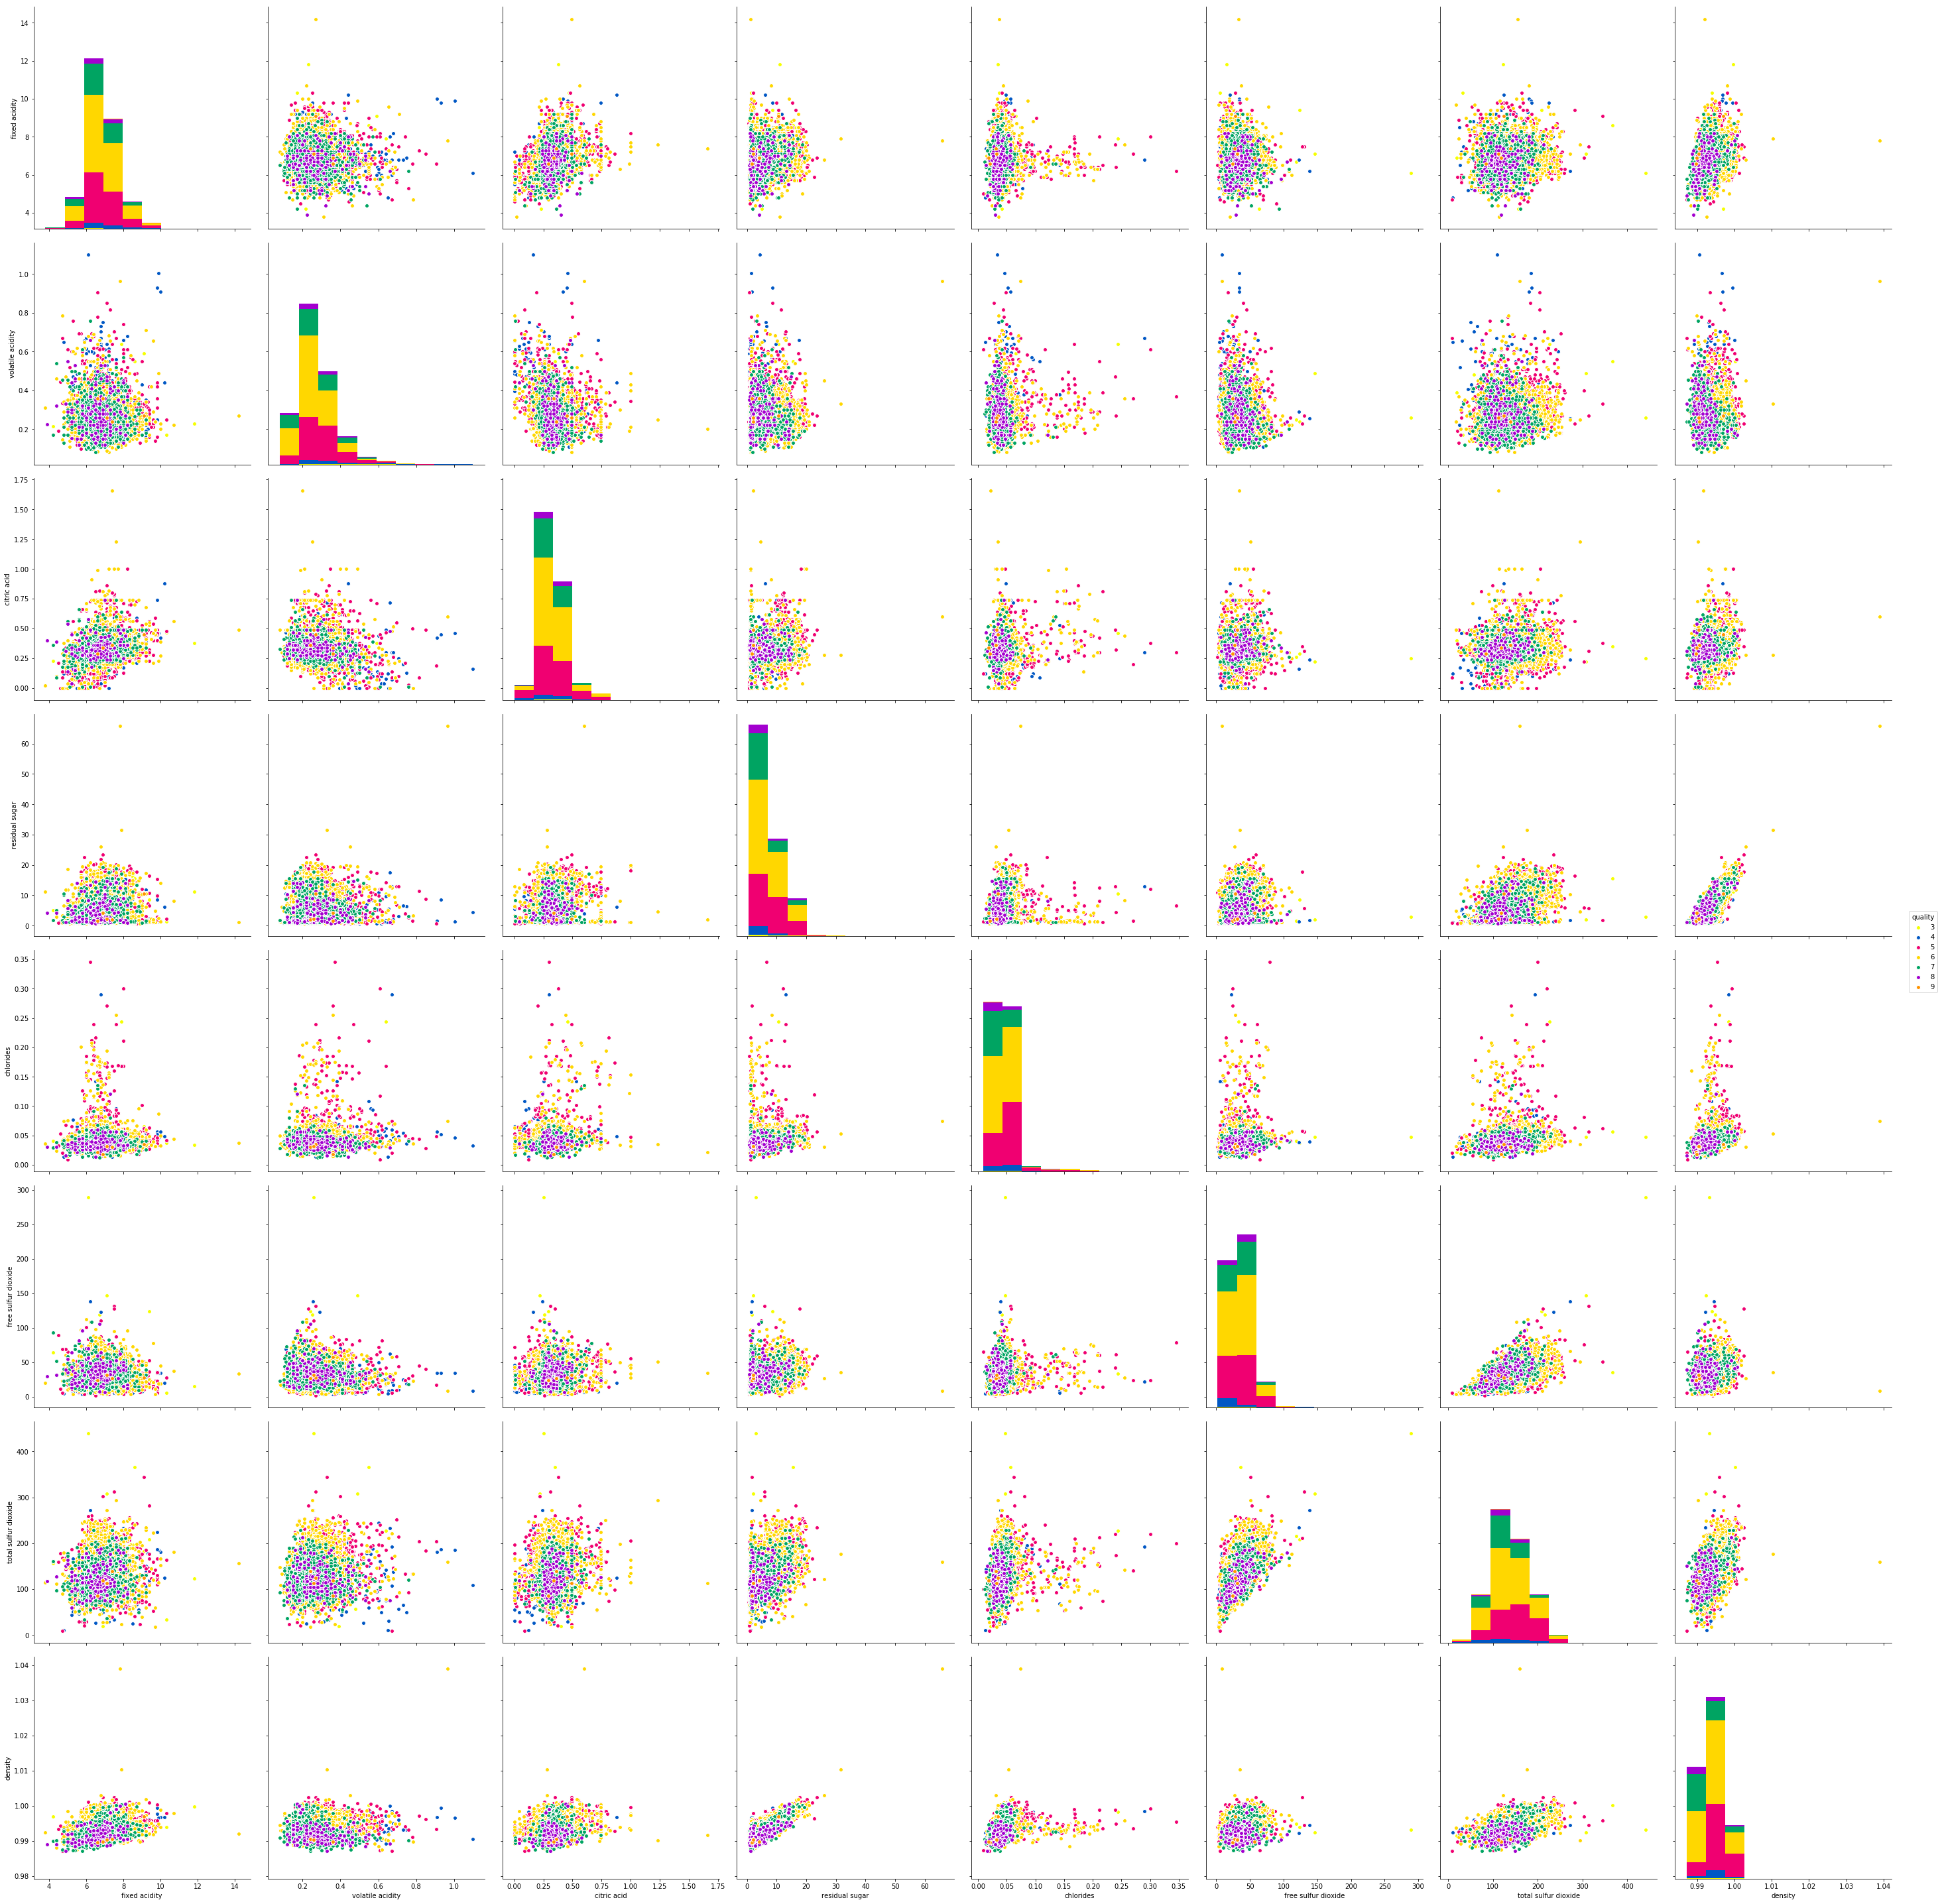

In [38]:
#white일때만
sns.pairplot(dataw, vars = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density'], hue='quality', size = 5, palette="prism")

# 훈련 데이터와 테스트 데이터
## 일단 전체 데이터로 했음

In [157]:
#x_train에 적재하기 위한 2차원 배열의 특성 dataset을 만든다.
#6463*11(?) 사이즈

#실험의 편의성을 위해 data마다 이름을 붙였다.
f1=data['fixed acidity']
f2=data['volatile acidity']
f3=data['citric acid']
f4=data['residual sugar']
f5=data['chlorides']
f6=data['free sulfur dioxide']
f7=data['total sulfur dioxide']
f8=data['density']
f9=data['pH']
f10=data['sulphates']
f11=data['alcohol']


c_data=np.c_[f1,f2,f4,f8,f9,f10,f11]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(c_data, data['quality'],random_state=0)

print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 7)
y_train 크기:  (4847,)
X_test 크기:  (1616, 7)
y_test 크기:  (1616,)


# k 최근접 이웃 알고리즘

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) ##train or fit, 학습시키기

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# 평가하기

In [160]:
y_pred=knn.predict(X_test)
print "테스트 세트에 대한 예측값: \n", y_pred

print"테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test))

테스트 세트에 대한 예측값: 
[5 6 6 ... 6 6 6]
테스트 세트의 정확도: 0.61


### feature에 따른 분석  

|<center>index</center>|<center>정확도</center>|
|:---|:---:|
|f1~11|0.56|
|f1,f2|0.43|
|f1~f3| 0.53|  
|f1~f4| 0.54 | 
|f1~f5| 0.53  |
|f1~f6| 0.54  |
|f1~f4,f6| 0.54|  
|f1~f7| 0.54  |
|f1~f8| 0.54  |
|f1~f9| 0.54  |
|f1~f10| 0.54  |
|f1~f11| 0.56|
|f3제외| 0.57 | 
|f5제외| 0.56  |
|f6,7제외| 0.60 | 
|f3,5,6,7제외|<span style="color:red">0.61</span>|

- 하다보면 더 좋은 결과가 있을 것으로 예상함